# Changing parameters part way through - simulate perturbation

In [3]:
import numpy as np
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Use saturated gLV

In [40]:
def lv_sat(X, t, muEc, muEf, M11, M22, M12, M21_EntA, Ks_EntA):

    x1, x2 = X
    dx1_dt = x1*muEc - x1*M11*x1 - x1*M12*x2
    dx2_dt = x2*muEf - x2*M22*x2-(x2*M21_EntA*x1/(Ks_EntA+x1))               
    return(np.array([dx1_dt, dx2_dt]))

### First phase of plot

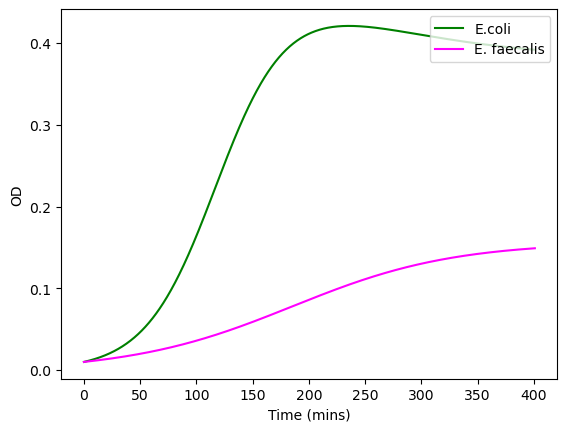

In [44]:
# Part 1 parameters
muEc = 0.033 # Ec growth rate
muEf = 0.037  # Ef growth rate
M11 = 0.066  # Ec -> Ec
M22 = 0.09  # Ef -> Ef
M12 = 0.05  # Ef -> Ec
M21_EntA = 0.023 # EcEntA -> Ef
#M21_EntB = 0.025 # EcEntB -> Ef
#M21_EntAB = 0.027 # EcEntAB -> Ef

Ks_EntA = 0.001
# Ks_EntA = 
# Ks_EntAB = 0.01


# Initial conditions = x1 and x2

x1 = 0.01  # Ec
x2 = 0.01  # Ef

# Time points
t = np.linspace(0, 401, 1000)
#print(t)


args = (muEc, muEf, M11, M22, M12, M21_EntA, Ks_EntA)
initial_con = [x1, x2]

# Solving the system of differential equations
solution = odeint(lv_sat, initial_con, t, args=args)

# Separating the solutions for each species
x1, x2 = solution.T



# plotting interaction
plt.plot(t, x1, color = "green", label = "E.coli")
plt.plot(t, x2, color = "magenta", label = "E. faecalis")
plt.legend(loc = "upper right")
plt.xlabel("Time (mins)")
plt.ylabel("OD")
plt.show()


### Second phase of plot

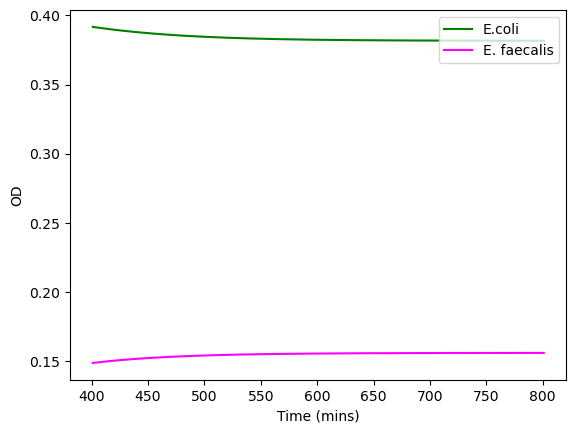

In [61]:
# Part 2 parameters
muEc_2 = 0.033 # Ec growth rate
muEf_2 = 0.037  # Ef growth rate
M11_2 = 0.066  # Ec -> Ec
M22_2 = 0.09  # Ef -> Ef
M12_2 = 0.05  # Ef -> Ec
M21_EntA_2 = 0.023 # EcEntA -> Ef
#M21_EntB_2 = 0.025 # EcEntB -> Ef
#M21_EntAB_2 = 0.027 # EcEntAB -> Ef

Ks_EntA_2 = 0.001
# Ks_EntA_2 = 
# Ks_EntAB_2 = 0.01

# Initial conditions = x1 and x2

x3 = x1[-1]  # final value for phase 1 Ec
x4 = x2[-1]  # final value for phase 1 Ef


# Time points
t_2 = np.linspace(t[-1], 801, 1000)
#print(t)


args = (muEc_2, muEf_2, M11_2, M22_2, M12_2, M21_EntA_2, Ks_EntA_2)
initial_con = [x3, x4]

# Solving the system of differential equations
solution = odeint(lv_sat, initial_con, t_2, args=args)

# Separating the solutions for each species
x3, x4 = solution.T

# plotting interaction
plt.plot(t_2, x3, color = "green", label = "E.coli")
plt.plot(t_2, x4, color = "magenta", label = "E. faecalis")
plt.legend(loc = "upper right")
plt.xlabel("Time (mins)")
plt.ylabel("OD")
plt.show()

## Plot both together

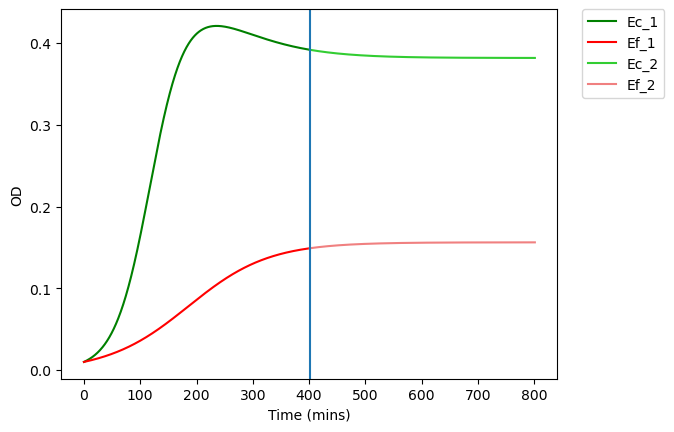

In [62]:
# plotting interaction
plt.plot(t, x1, color = "green", label = "Ec_1")
plt.plot(t, x2, color = "red", label = "Ef_1")
plt.plot(t_2, x3, color = "limegreen", label = "Ec_2")
plt.plot(t_2, x4, color = "lightcoral", label = "Ef_2")
#plt.legend(loc = "bottom right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Time (mins)")
plt.ylabel("OD")
plt.axvline(t[-1])
plt.show()